Prepare and modify figures for paper.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True


%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Data distribution
Adopted from build_models_07.ipynb.

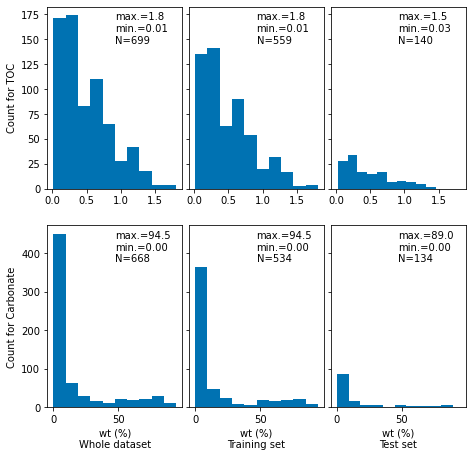

In [17]:
from sklearn.model_selection import train_test_split

fig, axes = plt.subplots(2, 3, sharex='row', sharey='row', figsize=(7.5, 7))
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
ca_df = merge_df[merge_df.core != 'SO178-12-3'] # This core doesn't have CaCO3 measurement

toc_y_train, toc_y_test = train_test_split(merge_df['TOC%'].values, test_size = 0.2, shuffle = True, random_state = 24)
ca_y_train, ca_y_test = train_test_split(ca_df['CaCO3%'].values, test_size = 0.2, shuffle = True, random_state = 24)


    #ax.set_xlabel('wt (%)\n{}'.format(label))
    
for ax, y, label in zip(axes[0, :], [merge_df['TOC%'], toc_y_train, toc_y_test], ['Whole dataset', 'Training set', 'Test set']):
    ax.hist(y)
    ax.text(0.5, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    
for ax, y, label in zip(axes[1, :], [ca_df['CaCO3%'], ca_y_train, ca_y_test], ['Whole dataset', 'Training set', 'Test set']):
    ax.hist(y)
    ax.text(0.5, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    ax.set_xlabel('wt (%)\n{}'.format(label))

axes[0, 0].set_ylabel('Count for TOC')
axes[1, 0].set_ylabel('Count for Carbonate')


fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_{}.png'.format(date))

In [19]:
np.unique(merge_df.core)

array(['LV28-44-3', 'LV29-114-3', 'SO178-12-3', 'SO264-13-2',
       'SO264-15-2', 'SO264-28-2', 'SO264-55-1', 'SO264-56-2',
       'SO264-64-1', 'SO264-66-2'], dtype=object)

In [18]:
merge_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.542079,0.394127,17.898887,SO264-64-1,115.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.247150,0.611208,13.632300,SO264-64-1,215.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.710588,0.523402,1.559822,SO264-64-1,305.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.562171,0.472551,0.746802,SO264-64-1,1015.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.578167,0.312852,2.210866,SO264-64-1,1815.0


## Show data distribution of each step

### Build datasets

In [4]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
merge_df.core.unique()

array(['SO264-64-1', 'SO264-66-2', 'SO264-56-2', 'SO264-28-2',
       'SO264-55-1', 'SO264-15-2', 'SO264-13-2', 'LV28-44-3',
       'LV29-114-3', 'SO178-12-3'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

#merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
SO264_core = merge_df.core.unique()[:-3]
scale_1_df = merge_df[merge_df.core.isin(SO264_core)].copy()
scale_2_ca = merge_df.loc[merge_df.core.isin(['LV28-44-3', 'LV29-114-3']), 'CaCO3%']
scale_2_toc = merge_df.loc[merge_df.core.isin(['LV28-44-3', 'LV29-114-3', 'SO178-12-3']), 'TOC%']


s1_toc_train, s1_toc_test, s1_ca_train, s1_ca_test = train_test_split(scale_1_df['TOC%'].values, scale_1_df['CaCO3%'].values, test_size = 0.2, shuffle = True, random_state = 24)
s2_toc_train, s2_toc_test = train_test_split(scale_2_toc, test_size = 0.2, shuffle = True, random_state = 24)
s2_ca_train, s2_ca_test = train_test_split(scale_2_ca, test_size = 0.2, shuffle = True, random_state = 24)

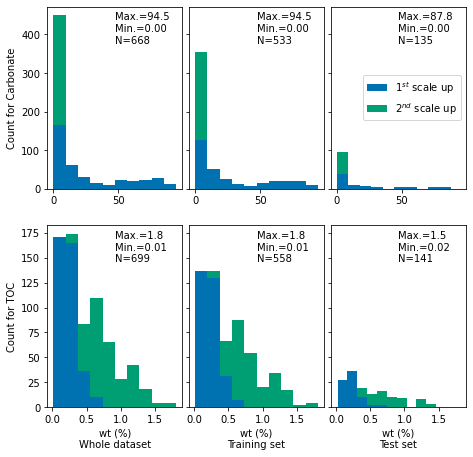

In [8]:
fig, axes = plt.subplots(2, 3, sharex='row', sharey='row', figsize=(7.5, 7))

#Carbonate
for ax, s1, s2 in zip(axes[0, :], [scale_1_df['CaCO3%'], s1_ca_train, s1_ca_test], 
                             [scale_2_ca, s2_ca_train, s2_ca_test]):
    y = np.hstack((s1, s2))
    ax.hist([s1, s2], stacked=True, label=['1$^{st}$ scale up', '2$^{nd}$ scale up'])
    ax.text(0.5, 0.8, "Max.={:.1f}\nMin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)

    
# TOC    
for ax, s1, s2, label in zip(axes[1, :], [scale_1_df['TOC%'], s1_toc_train, s1_toc_test], 
                             [scale_2_toc, s2_toc_train, s2_toc_test], ['Whole dataset', 'Training set', 'Test set']):
    y = np.hstack((s1, s2))
    ax.hist([s1, s2], stacked=True)
    ax.text(0.5, 0.8, "Max.={:.1f}\nMin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    ax.set_xlabel('wt (%)\n{}'.format(label))
    

axes[0, 0].set_ylabel('Count for Carbonate')
axes[1, 0].set_ylabel('Count for TOC')
axes[0, 2].legend(loc='center right')

fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_s1+2_{}.png'.format(date))

In [9]:
s1_toc = {'max': [], 'min': [], 'N':[]}
s1_ca = {'max': [], 'min': [], 'N':[]}
s2_toc = {'max': [], 'min': [], 'N':[]}
s2_ca = {'max': [], 'min': [], 'N':[]}

cols = []

for s, label, values in zip([s1_toc, s1_ca, s2_toc, s2_ca], ['s1_toc', 's1_ca', 's2_toc', 's2_ca'], [[scale_1_df['TOC%'], s1_toc_train, s1_toc_test], 
                                                                                                     [scale_1_df['CaCO3%'], s1_ca_train, s1_ca_test],
                                                                                                     [scale_2_toc, s2_toc_train, s2_toc_test],
                                                                                                     [scale_2_ca, s2_ca_train, s2_ca_test]]):
    for value, dataset in zip(values, ['whole', 'train', 'test']):
        s['max'].append(np.max(value))
        s['min'].append(np.min(value))
        s['N'].append(len(value))
        cols.append('{}_{}'.format(label, dataset))

In [10]:
data_info = pd.concat(
    [pd.DataFrame(s1_toc).T, pd.DataFrame(s1_ca).T, pd.DataFrame(s2_toc).T, pd.DataFrame(s2_ca).T],
     join='outer', axis=1
)
data_info.columns = cols
data_info

,s1_toc_whole,s1_toc_train,s1_toc_test,s1_ca_whole,s1_ca_train,s1_ca_test,s2_toc_whole,s2_toc_train,s2_toc_test,s2_ca_whole,s2_ca_train,s2_ca_test
max,0.715612,0.715612,0.663723,94.487199,94.487199,87.822175,1.8085,1.8085,1.4635,7.77,7.77,4.49982
min,0.014449,0.014449,0.023633,0.009081,0.009081,0.090807,0.3130,0.3130,0.3425,0.00,0.00,0.00000
N,382.000000,305.000000,77.000000,382.000000,305.000000,77.000000,317.0000,253.0000,64.0000,286.00,228.00,58.00000


In [23]:
data_info.to_csv('results/data_distribution_{}.csv'.format(date))

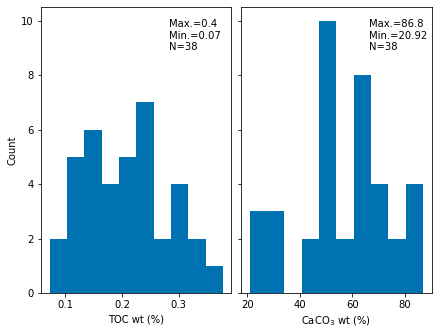

In [12]:
fig, axes =  plt.subplots(1, 2, figsize=(7, 5), sharey='row')

for ax, analyte in zip(axes, ['TOC%', 'CaCO3%']):
    y = merge_df.loc[merge_df.core == 'SO264-15-2', analyte]
    ax.hist(y)
    ax.text(0.67, 0.85, "Max.={:.1f}\nMin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)


axes[0].set_xlabel('TOC wt (%)')
axes[1].set_xlabel('CaCO$_{3}$ wt (%)')
axes[0].set_ylabel('Count')
fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_pilot_{}.png'.format(date))

# The performance in the test set
It's for the results of the 1st scale up.

In [2]:
from joblib import load
model_ca = load('models/caco3_nmf+svr_model_20201013.joblib')
model_toc = load('models/toc_nmf+svr_model_20201013.joblib')

In [10]:
from sklearn.model_selection import train_test_split
merge_df = pd.read_csv('data/spe+bulk_dataset_20201008.csv')
X = merge_df.iloc[:, 1: -5].values
X = X / X.sum(axis = 1, keepdims = True)
y_ca = merge_df['CaCO3%'].values
y_toc = merge_df['TOC%'].values

X_train, X_test, y_ca_train, y_ca_test, y_toc_train, y_toc_test = train_test_split(X, y_ca, y_toc, test_size = 0.2, shuffle = True, random_state = 24)

In [11]:
y_ca_predict = np.exp(model_ca.predict(X_test))
y_toc_predict = np.exp(model_toc.predict(X_test))

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y_ca_test, y_ca_predict)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y_ca_test, y_ca_predict)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y_ca_test, y_ca_predict)))

Scores in the test set:
R2 = 0.894 .
The mean absolute error is 4.731 (%, concetration).
The max. residual error is 50.121 (%, concetration).


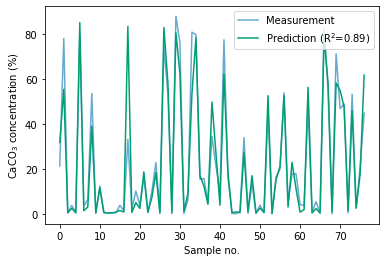

In [14]:
plt.plot(range(len(y_ca_predict)), y_ca_test, alpha=0.6, label='Measurement')
plt.plot(range(len(y_ca_predict)), y_ca_predict, label='Prediction (R$^2$={:.2f})'.format(r2_score(y_ca_test, y_ca_predict)))
#plt.text(12, -7, r'R$^2$={:.2f}, mean ab. error={:.2f}, max. ab. error={:.2f}'.format(grid.best_score_, mean_absolute_error(y_ttest, y_predict), max_error(y_ttest, y_predict)))
plt.ylabel('CaCO$_3$ concentration (%)')
plt.xlabel('Sample no.')
plt.legend(loc = 'upper right')
#plt.savefig('results/caco3_predictions_nmr+svr_{}.png'.format(date))

The performance is not consist with that in build_models_04.ipynb...

In [2]:
from dask.distributed import Client
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(
    project="aslee@10.110.16.5",
    queue='main',
    cores=40, 
    memory='10 GB',
    walltime="00:10:00",
    log_directory='job_logs'
)

In [3]:
client = Client(cluster)
cluster.scale(10)
#cluster.adapt(maximum=100)

In [6]:
client

Client Scheduler: tcp://10.110.10.28:34979 Dashboard: http://10.110.10.28:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [27]:
client.close()
cluster.close()

In [4]:
from dask_ml.model_selection import train_test_split
import dask.dataframe as dd

merge_df = dd.read_csv('data/spe+bulk_dataset_20201008.csv')
X = merge_df.iloc[:, 1: -5].to_dask_array(lengths=True)
X = X / X.sum(axis = 1, keepdims = True)
y = merge_df['CaCO3%'].to_dask_array(lengths=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)

In [20]:
y_predict = np.exp(model_ca.predict(X_test))

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y_test, y_predict)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y_test, y_predict)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y_test, y_predict)))

Scores in the test set:
R2 = 0.902 .
The mean absolute error is 6.198 (%, concetration).
The max. residual error is 37.643 (%, concetration).


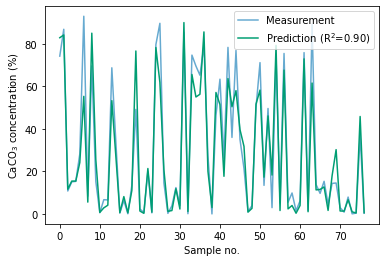

In [25]:
plt.plot(range(len(y_predict)), y_test, alpha=0.6, label='Measurement')
plt.plot(range(len(y_predict)), y_predict, label='Prediction (R$^2$={:.2f})'.format(r2_score(y_test, y_predict)))
#plt.text(12, -7, r'R$^2$={:.2f}, mean ab. error={:.2f}, max. ab. error={:.2f}'.format(grid.best_score_, mean_absolute_error(y_ttest, y_predict), max_error(y_ttest, y_predict)))
plt.ylabel('CaCO$_3$ concentration (%)')
plt.xlabel('Sample no.')
plt.legend(loc = 'upper right')
#plt.savefig('results/caco3_predictions_nmr+svr_{}.png'.format(date))

After some tryouts above, I realized train_test_split in dask_ml and sklearn produce different subsets although the random_state is setted same. In order to be consist with build_models_04.ipynb (having same subsets) and avoid data-snooping, I need to use dask here in the 1st scale up. Later in the 2nd scale it's nont needed because the works were submitted using scripts.

In [5]:
from dask_ml.model_selection import train_test_split
import dask.dataframe as dd

merge_df = dd.read_csv('data/spe+bulk_dataset_20201008.csv')
X = merge_df.iloc[:, 1: -5].to_dask_array(lengths=True)
X = X / X.sum(axis = 1, keepdims = True)
y_ca = merge_df['CaCO3%'].to_dask_array(lengths=True)
y_toc = merge_df['TOC%'].to_dask_array(lengths=True)

X_train, X_test, y_ca_train, y_ca_test, y_toc_train, y_toc_test = train_test_split(X, y_ca, y_toc, test_size = 0.2, shuffle = True, random_state = 24)

In [6]:
from joblib import load
model_ca = load('models/caco3_nmf+svr_model_20201013.joblib')
model_toc = load('models/toc_nmf+svr_model_20201013.joblib')

In [7]:
y_ca_predict = np.exp(model_ca.predict(X_test))
y_toc_predict = np.exp(model_toc.predict(X_test))

# change to np.array from dask array, which is easier for later fune-tuning plot
y_ca_test = np.array(y_ca_test)
y_toc_test = np.array(y_toc_test)

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y_toc_test, y_toc_predict)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y_toc_test, y_toc_predict)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y_toc_test, y_toc_predict)))

Scores in the test set:
R2 = 0.557 .
The mean absolute error is 0.057 (%, concetration).
The max. residual error is 0.435 (%, concetration).


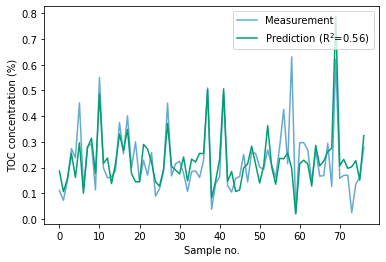

In [15]:
plt.plot(range(len(y_toc_predict)), y_toc_test, alpha=0.6, label='Measurement')
plt.plot(range(len(y_toc_predict)), y_toc_predict, label='Prediction (R$^2$={:.2f})'.format(r2_score(y_toc_test, y_toc_predict)))
#plt.text(12, -7, r'R$^2$={:.2f}, mean ab. error={:.2f}, max. ab. error={:.2f}'.format(grid.best_score_, mean_absolute_error(y_ttest, y_predict), max_error(y_ttest, y_predict)))
plt.ylabel('TOC concentration (%)')
plt.xlabel('Sample no.')
plt.legend(loc = 'upper right')
#plt.savefig('results/toc_predictions_nmr+svr_{}.png'.format(date))

Just for double check. The TOC's performance is consistent to build_models_05.ipynb.

### Plot A

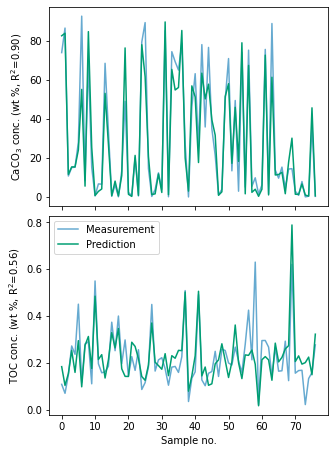

In [47]:
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 1, figsize=(5, 7.5), sharex='col')
axes[0].plot(range(len(y_ca_test)), y_ca_test, alpha=0.6, label='Measurement')
axes[0].plot(range(len(y_ca_predict)), y_ca_predict, label='Prediction')
axes[0].set_ylabel('CaCO$_3$ conc. (wt %, R$^2$={:.2f})'.format(r2_score(y_ca_test, y_ca_predict)))
                   
axes[1].plot(range(len(y_toc_test)), y_toc_test, alpha=0.6, label='Measurement')
axes[1].plot(range(len(y_toc_predict)), y_toc_predict, label='Prediction')
axes[1].set_ylabel('TOC conc. (wt %, R$^2$={:.2f})'.format(r2_score(y_toc_test, y_toc_predict)))
axes[1].legend(loc='upper left')
axes[1].set_yticks(np.linspace(0, 0.8, 5))

axes[1].set_xlabel('Sample no.')
fig.subplots_adjust(hspace=.05)
fig.savefig('results/1st_performance_test_a_{}.png'.format(date))

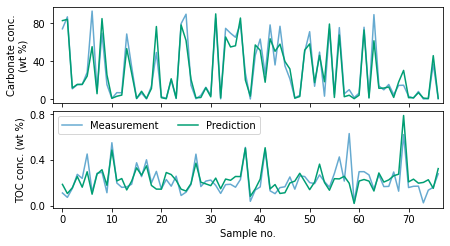

In [22]:
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')
axes[0].plot(range(len(y_ca_test)), y_ca_test, alpha=0.6, label='Measurement')
axes[0].plot(range(len(y_ca_predict)), y_ca_predict, label='Prediction')
axes[0].set_ylabel('Carbonate conc.\n(wt %)')
axes[0].set_yticks(np.linspace(0, 80, 3))
axes[0].set_xlim(-2, 77)
                  
axes[1].plot(range(len(y_toc_test)), y_toc_test, alpha=0.6, label='Measurement')
axes[1].plot(range(len(y_toc_predict)), y_toc_predict, label='Prediction')
axes[1].set_ylabel('TOC conc. (wt %)')
axes[1].legend(loc='upper left', ncol=2)
axes[1].set_yticks(np.linspace(0, 0.8, 3))

axes[1].set_xlabel('Sample no.')
fig.subplots_adjust(hspace=.08)
fig.savefig('results/1st_performance_test_a_{}.png'.format(date))

### Plot B

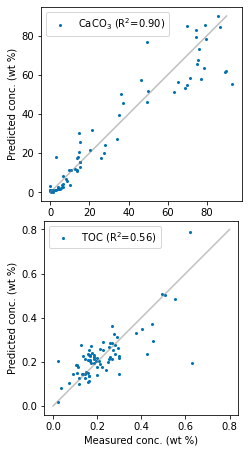

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(5, 7.5))

ind = np.argsort(y_ca_test)
axes[0].scatter(y_ca_test[ind], y_ca_predict[ind], s=4, label='CaCO$_3$ (R$^2$={:.2f})'.format(r2_score(y_ca_test, y_ca_predict)))
axes[0].plot(np.linspace(0, 90, 10), np.linspace(0, 90, 10), alpha=.5, c='gray')
axes[0].set_ylabel('Predicted conc. (wt %)')
axes[0].legend(loc = 'upper left')
axes[0].set_aspect('equal')

ind = np.argsort(y_toc_test)
axes[1].scatter(y_toc_test[ind], y_toc_predict[ind], s=4, label='TOC (R$^2$={:.2f})'.format(r2_score(y_toc_test, y_toc_predict)))
axes[1].plot(np.linspace(0, 0.8, 9), np.linspace(0, 0.8, 9), alpha=.5, c='gray')
axes[1].set_ylabel('Predicted conc. (wt %)')
axes[1].set_xlabel('Measured conc. (wt %)')
axes[1].legend(loc = 'upper left')
axes[1].set_aspect('equal')
axes[1].set_yticks(np.linspace(0, 0.8, 5))

fig.subplots_adjust(hspace=.1)
fig.savefig('results/1st_performance_test_b_{}.png'.format(date))

### Choose plot
Two plots use the same data (performance in the test set) but different illustrations. Both are used to demonstrate performance of predicetions commonly. Plot A provides the comparison of sample behaviors in different analytes since the x-axis are the sample number. It shows that, samples having bad predictions in TOC don't necessary have bad prediction in carbonate. Also, it looks subjectively better in accuracy. Plot B display the error distribution along concentration more directly, but loose the ability of making comparison in samples between analytes. I prefer plot A becuase the relation of error and concentration is not clear in our result, making the advantage of plot B less important. 

# Test the 1st scale up models on the 2nd scale up dataset
During writing the paper, I realize the evaluation using models in 1st scale up and datasets in 2nd scale up need to be modified. The previous codes just fed the whole dataset in the 2nd scale up, including the 1st scale up, to the model to see how bad the predictions on the new dataset comparing to the old dataset in the same figure. I think it's a bit redundant because the old dataset contains modtly the training set of those models. The models should perform well on that.

## Check two datasets

In [9]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
merge_df

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.542079,0.394127,17.898887,SO264-64-1,115.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.247150,0.611208,13.632300,SO264-64-1,215.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.710588,0.523402,1.559822,SO264-64-1,305.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.562171,0.472551,0.746802,SO264-64-1,1015.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.578167,0.312852,2.210866,SO264-64-1,1815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.710000,NaN,SO178-12-3,5715.0
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.730000,NaN,SO178-12-3,5915.0
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.710000,NaN,SO178-12-3,6015.0
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.730000,NaN,SO178-12-3,6215.0


In [20]:
merge_df[merge_df.core.isin(['LV28-44-3', 'LV29-114-3', 'SO178-12-3'])]

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.4230,3.85,LV28-44-3,25.0
389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.4020,4.99,LV28-44-3,75.0
390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.2900,4.96,LV28-44-3,125.0
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.4595,2.92,LV28-44-3,175.0
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.3025,4.43,LV28-44-3,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.7100,NaN,SO178-12-3,5715.0
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.7300,NaN,SO178-12-3,5915.0
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.7100,NaN,SO178-12-3,6015.0
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.7300,NaN,SO178-12-3,6215.0


In [8]:
merge_old = pd.read_csv('data/spe+bulk_dataset_20201008.csv', index_col=0)
merge_old

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.542079,0.394127,17.898887,SO264-64-1,115
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.247150,0.611208,13.632300,SO264-64-1,215
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.710588,0.523402,1.559822,SO264-64-1,305
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.562171,0.472551,0.746802,SO264-64-1,1015
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.578167,0.312852,2.210866,SO264-64-1,1815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.221641,0.269061,49.602848,SO264-13-2,11435
384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.961034,0.254319,64.220052,SO264-13-2,11535
385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.598575,0.175505,53.523438,SO264-13-2,11835
386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.530931,0.186714,69.532368,SO264-13-2,11935


In [11]:
699-382

317

In [7]:
merge_df.core.unique()

array(['SO264-64-1', 'SO264-66-2', 'SO264-56-2', 'SO264-28-2',
       'SO264-55-1', 'SO264-15-2', 'SO264-13-2', 'LV28-44-3',
       'LV29-114-3', 'SO178-12-3'], dtype=object)

Those three new core only have 254 data points and the old dataset has 382. The new core should have 317 data points so there are 63 ghost points in the new dataset.

In [19]:
pd.concat([
    pd.DataFrame(np.unique(merge_df.core, return_counts=True), index=['core', 'N']).T.set_index('core'),
    pd.DataFrame(np.unique(merge_old.core, return_counts=True), index=['core', 'N']).T.set_index('core')],
    join='outer', axis=1)

,N,N
LV28-44-3,223,NaN
LV29-114-3,63,NaN
SO178-12-3,31,NaN
SO264-13-2,39,39
SO264-15-2,38,38
SO264-28-2,38,38
SO264-55-1,157,157
SO264-56-2,34,34
SO264-64-1,37,37
SO264-66-2,39,39


It's just a double check. Two datasets look fine.

In [26]:
from joblib import load
model_ca = load('models/caco3_nmf+svr_model_20201013.joblib')
model_toc = load('models/toc_nmf+svr_model_20201013.joblib')

In [30]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv')

X = merge_df.iloc[:, 1: -5].values
X = X / X.sum(axis = 1, keepdims = True)
y_ca = merge_df.loc[merge_df.core.isin(['LV28-44-3', 'LV29-114-3']), 'CaCO3%']
y_toc = merge_df.loc[merge_df.core.isin(['LV28-44-3', 'LV29-114-3', 'SO178-12-3']), 'TOC%']

In [45]:
print(len(y_ca), len(y_toc))

286 317


In [31]:
y_ca_predict = np.exp(model_ca.predict(X[merge_df.core.isin(['LV28-44-3', 'LV29-114-3'])]))
y_toc_predict = np.exp(model_toc.predict(X[merge_df.core.isin(['LV28-44-3', 'LV29-114-3', 'SO178-12-3'])]))

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y_ca, y_ca_predict)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y_ca, y_ca_predict)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y_ca, y_ca_predict)))

Scores in the test set:
R2 = -17.812 .
The mean absolute error is 4.758 (%, concetration).
The max. residual error is 27.159 (%, concetration).


In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y_toc, y_toc_predict)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y_toc, y_toc_predict)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y_toc, y_toc_predict)))

Scores in the test set:
R2 = -1.509 .
The mean absolute error is 0.398 (%, concetration).
The max. residual error is 1.199 (%, concetration).


20210330


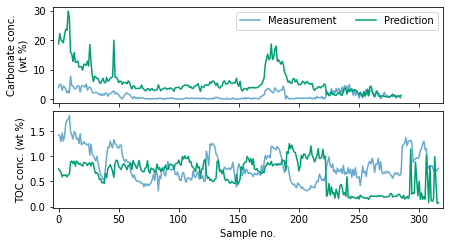

In [44]:
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')
axes[0].plot(range(len(y_ca)), y_ca, alpha=0.6, label='Measurement')
axes[0].plot(range(len(y_ca_predict)), y_ca_predict, label='Prediction')
axes[0].set_ylabel('Carbonate conc.\n(wt %)')
#axes[0].set_yticks(np.linspace(0, 80, 3))
axes[0].set_xlim(-5, 320)
axes[0].legend(loc='upper right', ncol=2)
                  
axes[1].plot(range(len(y_toc)), y_toc, alpha=0.6, label='Measurement')
axes[1].plot(range(len(y_toc_predict)), y_toc_predict, label='Prediction')
axes[1].set_ylabel('TOC conc. (wt %)')
#axes[1].set_yticks(np.linspace(0, 0.8, 3))

axes[1].set_xlabel('Sample no.')
fig.subplots_adjust(hspace=.08)
fig.savefig('results/1st_performance_2nddataset_{}.png'.format(date))
print(date)

As we already know, the prediction based on extrapolation gives poor results.

# The performance in the test set
It's for the results of the 2nd scale up.

In [2]:
from joblib import load
model_ca = load('models/caco3_nmf+svr_model_20201216.joblib')
model_toc = load('models/toc_nmf+svr_model_20201215.joblib')

In [3]:
from sklearn.model_selection import train_test_split

merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv')

X = merge_df.iloc[:, 1: -5].values
X = X / X.sum(axis = 1, keepdims = True)
y_ca = merge_df.loc[merge_df.core != 'SO178-12-3', 'CaCO3%']
y_toc = merge_df['TOC%']

_, X_ca_test, _, y_ca_test = train_test_split(
    X[merge_df.core != 'SO178-12-3'],
    y_ca,
    test_size = 0.2, shuffle = True, random_state = 24)

_, X_toc_test, _, y_toc_test = train_test_split(
    X,
    y_toc,
    test_size = 0.2, shuffle = True, random_state = 24)

In [4]:
y_ca_predict = np.exp(model_ca.predict(X_ca_test))
y_toc_predict = np.exp(model_toc.predict(X_toc_test))

In [55]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y_ca_test, y_ca_predict)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y_ca_test, y_ca_predict)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y_ca_test, y_ca_predict)))

Scores in the test set:
R2 = 0.977 .
The mean absolute error is 2.095 (%, concetration).
The max. residual error is 15.786 (%, concetration).


In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y_toc_test, y_toc_predict)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y_toc_test, y_toc_predict)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y_toc_test, y_toc_predict)))

Scores in the test set:
R2 = 0.854 .
The mean absolute error is 0.089 (%, concetration).
The max. residual error is 0.666 (%, concetration).


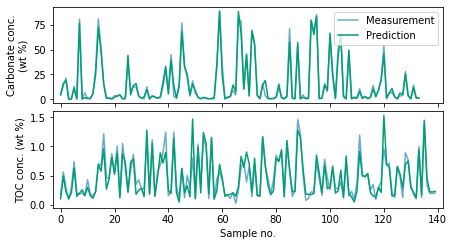

In [8]:
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')
axes[0].plot(range(len(y_ca_test)), y_ca_test, alpha=0.6, label='Measurement')
axes[0].plot(range(len(y_ca_predict)), y_ca_predict, label='Prediction')
axes[0].set_ylabel('Carbonate conc.\n(wt %)')
axes[0].legend(loc='upper right')
#axes[0].set_yticks(np.linspace(0, 80, 3))
axes[0].set_xlim(-3, 142)
                  
axes[1].plot(range(len(y_toc_test)), y_toc_test, alpha=0.6, label='Measurement')
axes[1].plot(range(len(y_toc_predict)), y_toc_predict, label='Prediction')
axes[1].set_ylabel('TOC conc. (wt %)')
#axes[1].set_yticks(np.linspace(0, 0.8, 3))

axes[1].set_xlabel('Sample no.')
fig.subplots_adjust(hspace=.08)
fig.savefig('results/2nd_performance_test_{}.png'.format(date))

# Draw spectrum

In [4]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
merge_df.core.unique()

array(['SO264-64-1', 'SO264-66-2', 'SO264-56-2', 'SO264-28-2',
       'SO264-55-1', 'SO264-15-2', 'SO264-13-2', 'LV28-44-3',
       'LV29-114-3', 'SO178-12-3'], dtype=object)

In [6]:
from sklearn.model_selection import train_test_split
X = merge_df.iloc[:, : -5].values
X = X / X.sum(axis = 1, keepdims = True)

SO264_core = merge_df.core.unique()[:-3]

s1_X_train, _ = train_test_split(X[merge_df.core.isin(SO264_core)], test_size = 0.2, shuffle = True, random_state = 24)
s2_toc_train, _ = train_test_split(X[merge_df.core.isin(['LV28-44-3', 'LV29-114-3', 'SO178-12-3'])], test_size = 0.2, shuffle = True, random_state = 24)
s2_ca_train, _ = train_test_split(X[merge_df.core.isin(['LV28-44-3', 'LV29-114-3'])], test_size = 0.2, shuffle = True, random_state = 24)

In [8]:
print(s1_X_train.shape, s2_toc_train.shape, s2_ca_train.shape)

(305, 2048) (253, 2048) (228, 2048)


The sum of carbonate and TOC training data amounts fit to the histogram, respectively.

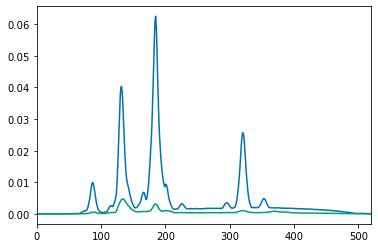

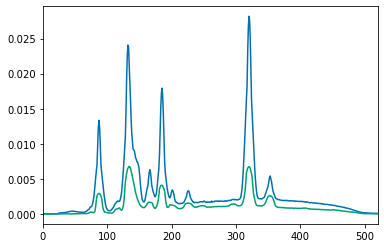

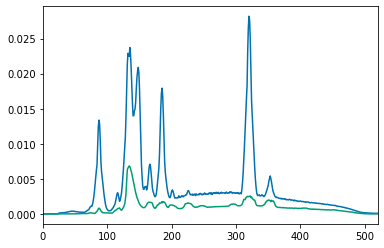

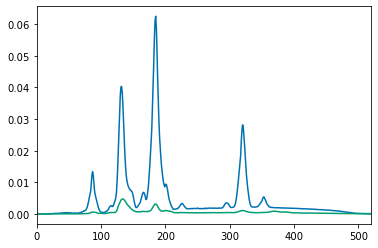

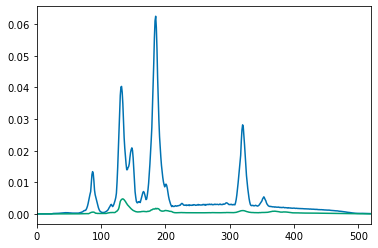

In [24]:
for X_train in [s1_X_train, s2_ca_train, s2_toc_train, np.vstack((s1_X_train, s2_ca_train)), np.vstack((s1_X_train, s2_toc_train))]:
    fig, ax = plt.subplots(1, 1)
    ax.plot(range(2048), X_train.max(axis=0))
    ax.plot(range(2048), X_train.min(axis=0));
    plt.xlim(0, 520)

I don't have enough time to fine-tune a figure for all these spectra in different steps and analytes so I plot the figure of the 1st+2nd scale ups only for now.

20210331


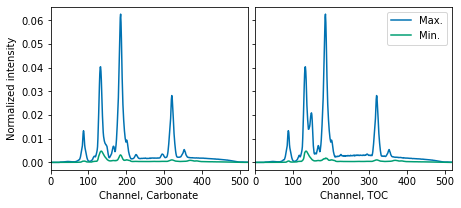

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(7.2, 3), sharex='row', sharey='row')

axes[0].plot(range(2048), np.vstack((s1_X_train, s2_ca_train)).max(axis=0), label='Max.')
axes[0].plot(range(2048), np.vstack((s1_X_train, s2_ca_train)).min(axis=0), label='Min.')
axes[0].set_xlim(0, 520)
axes[0].set_ylabel('Normalized intensity')
axes[0].set_xlabel('Channel, Carbonate')

axes[1].plot(range(2048), np.vstack((s1_X_train, s2_toc_train)).max(axis=0), label='Max.')
axes[1].plot(range(2048), np.vstack((s1_X_train, s2_toc_train)).min(axis=0), label='Min.')
axes[1].set_xlabel('Channel, TOC')
axes[1].legend()

fig.subplots_adjust(wspace=.04)
fig.savefig('results/spectral_range_{}.png'.format(date))
print(date)

In [32]:
spe_list = []
ind_list = []
for X_train, label in zip([s1_X_train, s2_ca_train, s2_toc_train, np.vstack((s1_X_train, s2_ca_train)), np.vstack((s1_X_train, s2_toc_train))], 
                          ['s1 whole', 's2 ca', 's2 toc', 's1+s2 ca', 's1+s2 toc']):
    spe_list.append(X_train.max(axis=0))
    spe_list.append(X_train.min(axis=0))
    ind_list.append('{} max.'.format(label))
    ind_list.append('{} min.'.format(label))

In [36]:
pd.DataFrame(spe_list, index=ind_list)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
s1 whole max.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.590640e-07,0.0,0.0,0.0
s1 whole min.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
s2 ca max.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
s2 ca min.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
s2 toc max.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
s2 toc min.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
s1+s2 ca max.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.590640e-07,0.0,0.0,0.0
s1+s2 ca min.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
s1+s2 toc max.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.590640e-07,0.0,0.0,0.0
s1+s2 toc min.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0


In [38]:
pd.DataFrame(spe_list, index=ind_list).to_csv('results/spectral_range_{}.csv'.format(date))
print(date)

20210331
